In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing

In [ ]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
ytrain_l = y_train.tolist()
ytest_l = y_test.tolist()
types = y.unique()


In [ ]:
types

array([0, 1, 2])

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit(X_train_s)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
clusters.

array([1, 1, 0, 1, 1, 3, 1, 1, 3, 0, 3, 4, 3, 4, 0, 4, 4, 1, 1, 4, 2, 2,
       1, 1, 0, 1, 2, 2, 2, 4, 3, 0, 0, 3, 0, 1, 0, 1, 0, 0, 3, 0, 3, 3,
       0, 1, 2, 0, 3, 3, 3, 3, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 0,
       1, 3, 0, 4, 1, 0, 2, 1, 1, 0, 3, 1, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1,
       0, 1, 1, 1, 0, 4, 2, 4, 2, 1, 1, 2, 2, 4, 3, 1, 1, 0, 0, 1, 2, 3,
       2, 0, 4, 0, 2, 3, 2, 0, 1], dtype=int32)

In [ ]:
k_values = []
evaluation_metrics = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
  kmeans.fit(X_train_s)

  res = []
  r = []
  rt = [0] * k
  ra = [0] * k

  for i in range(k):
    tmp = dict()
    for j in types:
      tmp[j] = list((0,0))
    res.append(tmp)

  for i in range(len(ytrain_l)):
    res[kmeans.labels_[i]][ytrain_l[i]][0] += 1

  for i in range(k):
    o = str(i)
    m = ''
    mm = 0
    for j in types:
      o += "\t" + str(res[i][j][0])
      if res[i][j][0] > mm:
        m = j

      o += "\t" + str(m)
      r.append(m)

  y_pred = kmeans.predict(X_test_s)

  for i in range(len(y_pred)):
    rt[y_pred[i]] += 1
    res[y_pred[i]][ytest_l[i]][1] +=1

    if ytest_l[i] == r[y_pred[i]]:
      ra[y_pred[i]] += 1

  rf = 0
  for i in range(k):
    o = 0
    if rt[i]:
      o = ra[i] / rt[i]
    rf += o
  k_values.append(k)
  evaluation_metrics.append(rf)

  print("%1d\t%.3f" % (k, rf / k))


2	0.429
3	0.644
4	0.305
5	0.175
6	0.166
7	0.355
8	0.483
9	0.056


Text(0, 0.5, 'Metrica de Evaluacion')

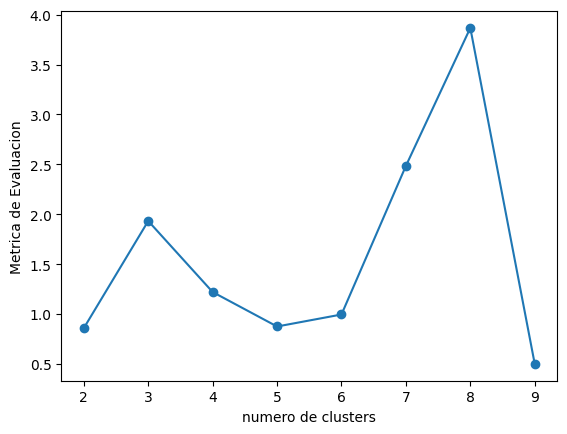

In [ ]:
plt.plot(k_values, evaluation_metrics, marker='o')
plt.xlabel('numero de clusters')
plt.ylabel('Metrica de Evaluacion')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_train_s, X_test_s, y_train, y_test = train_test_split(X_pca, y, test_size=0.33, random_state=0)

In [ ]:
k_values = []
evaluation_metrics = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
  kmeans.fit(X_train_s)

  res = []
  r = []
  rt = [0] * k
  ra = [0] * k

  for i in range(k):
    tmp = dict()
    for j in types:
      tmp[j] = list((0,0))
    res.append(tmp)

  for i in range(len(ytrain_l)):
    res[kmeans.labels_[i]][ytrain_l[i]][0] += 1

  for i in range(k):
    o = str(i)
    m = ''
    mm = 0
    for j in types:
      o += "\t" + str(res[i][j][0])
      if res[i][j][0] > mm:
        m = j

      o += "\t" + str(m)
      r.append(m)

  y_pred = kmeans.predict(X_test_s)

  for i in range(len(y_pred)):
    rt[y_pred[i]] += 1
    res[y_pred[i]][ytest_l[i]][1] +=1

    if ytest_l[i] == r[y_pred[i]]:
      ra[y_pred[i]] += 1

  rf = 0
  for i in range(k):
    o = 0
    if rt[i]:
      o = ra[i] / rt[i]
    rf += o
  k_values.append(k)
  evaluation_metrics.append(rf)

  print("%1d\t%.3f" % (k, rf / k))


2	0.406
3	0.043
4	0.450
5	0.065
6	0.417
7	0.161
8	0.234
9	0.238


Text(0, 0.5, 'Metrica de Evaluacion')

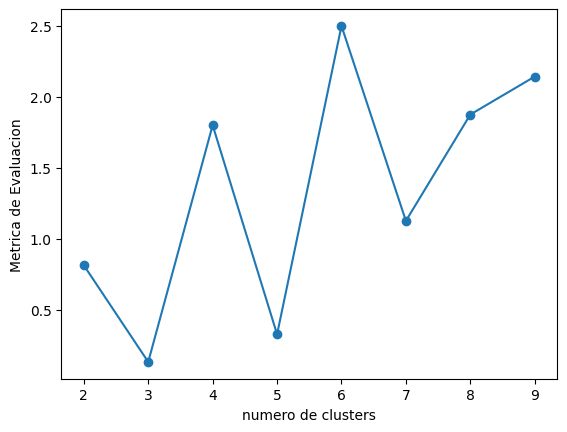

In [ ]:
plt.plot(k_values, evaluation_metrics, marker='o')
plt.xlabel('numero de clusters')
plt.ylabel('Metrica de Evaluacion')

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
clusters = kmeans.fit_predict(X_pca)

Text(0, 0.5, 'PC 2')

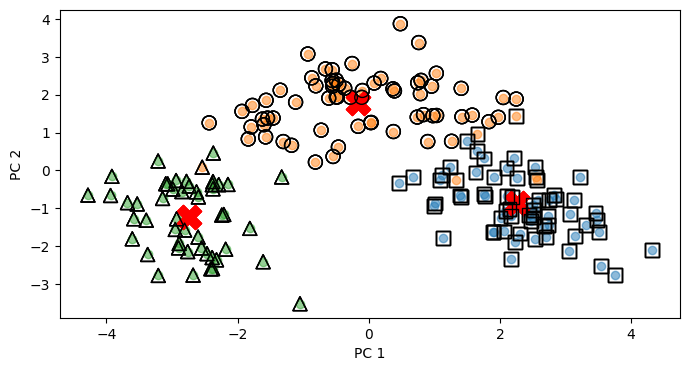

In [ ]:
plt.figure(figsize=(8,4))

for i, target_name in enumerate(wine.target_names):
  plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
              label=f'True Class {target_name}', alpha=.5)
  plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
              s=300, c='red', label='Cluster centers', marker='X')

  markers = ['o', 's','^']
  for cluster in range(3):
    plt.scatter(X_pca[clusters==cluster, 0], X_pca[clusters==cluster, 1],
                marker=markers[cluster], edgecolor='k', facecolor='none',
                s=100, label=f'Cluster {cluster}')


#plt.legend()
plt.xlabel('PC 1')
plt.ylabel('PC 2')